In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"


In [4]:
data = pd.read_csv(r'.\data\final_results.csv')  ##concentration of chemicals, can be found in TableS2.
data.rename(columns={'temperature':'T'},inplace=True)

In [5]:
group = data.groupby(by=['T','c/w'],as_index = False).mean()
column = group.columns[2:,]
print(column)

Index(['L-Malic acid', 'Trigonelline', 'Pyrogallol', 'Cinnamic acid',
       'Citric acid', 'Quinic acid', 'Fructose', 'Glucose', 'Ferulic acid',
       'Caffeic acid', 'Sucrose', 'Lactose', 'Maltose', 'Chlorogenic acid',
       'Caffeine'],
      dtype='object')


In [6]:
group
cga = group['Chlorogenic acid']

In [7]:
tavlist = [121,217,1200,16,127,1220,900,700,20,0.576,490,29,55,51,0.6208] ##TAV table

for N, name in enumerate(column):
    c = group[name]
    group[name] = c*1000/tavlist[N]

In [8]:
group.rename(columns = {'T':'Water/Coffee Ratio','c/w':'T','Chlorogenic acid':'CGA(Bitterness)'},inplace = True)
#group.drop(columns=['Caffeine(Relative)','CGA(Relative)'])
group['CGA(Acidity)'] = cga*1000/362

In [9]:
c10 = group[group['Water/Coffee Ratio']==10]
c12 = group[group['Water/Coffee Ratio']==12]
c14 = group[group['Water/Coffee Ratio']==14]
c15 = group[group['Water/Coffee Ratio']==15]
c17 = group[group['Water/Coffee Ratio']==17]
c19 = group[group['Water/Coffee Ratio']==19]

In [10]:
def plot(name,number):
    #ax=plt.figure(dpi=300,figsize = [12,8])
    plt.plot(c10['T'],c10[name],'o-',label='Water/Coffee=10',linewidth = 4)
    plt.plot(c12['T'],c12[name],'o-',label='Water/Coffee=12',linewidth = 4)
    plt.plot(c14['T'],c14[name],'o-',label='Water/Coffee=14',linewidth = 4)
    plt.plot(c15['T'],c15[name],'o-',label='Water/Coffee=15',linewidth = 4)
    plt.plot(c17['T'],c17[name],'o-',label='Water/Coffee=17',linewidth = 4)
    plt.plot(c19['T'],c19[name],'o-',label='Water/Coffee=19',linewidth = 4)
    plt.scatter(c10['T'],c10[name],s = 10)
    plt.scatter(c12['T'],c12[name],s = 10)
    plt.scatter(c14['T'],c14[name],s = 10)
    plt.scatter(c15['T'],c15[name],s = 10)
    plt.scatter(c17['T'],c17[name],s = 10)
    plt.scatter(c19['T'],c19[name],s = 10)
    plt.legend(fontsize = 15,loc = 'best')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.xlabel('Temperature($^oC$)',fontsize = 30)
    plt.ylabel('TAV',fontsize = 30)
    ax = plt.gca()
    #plt.ylim([1e6,7.4e6])
    ax.yaxis.offsetText.set_fontsize(30)
    #plt.axhline(y = 1.0,color = 'grey',linewidth = 3,linestyle ='--')
    
    #plt.ticklabel_format(axis="y",fontsize = 15) 
    plt.title(number,fontsize = 15)
    plt.grid()
    #plt.savefig(name+'.png')

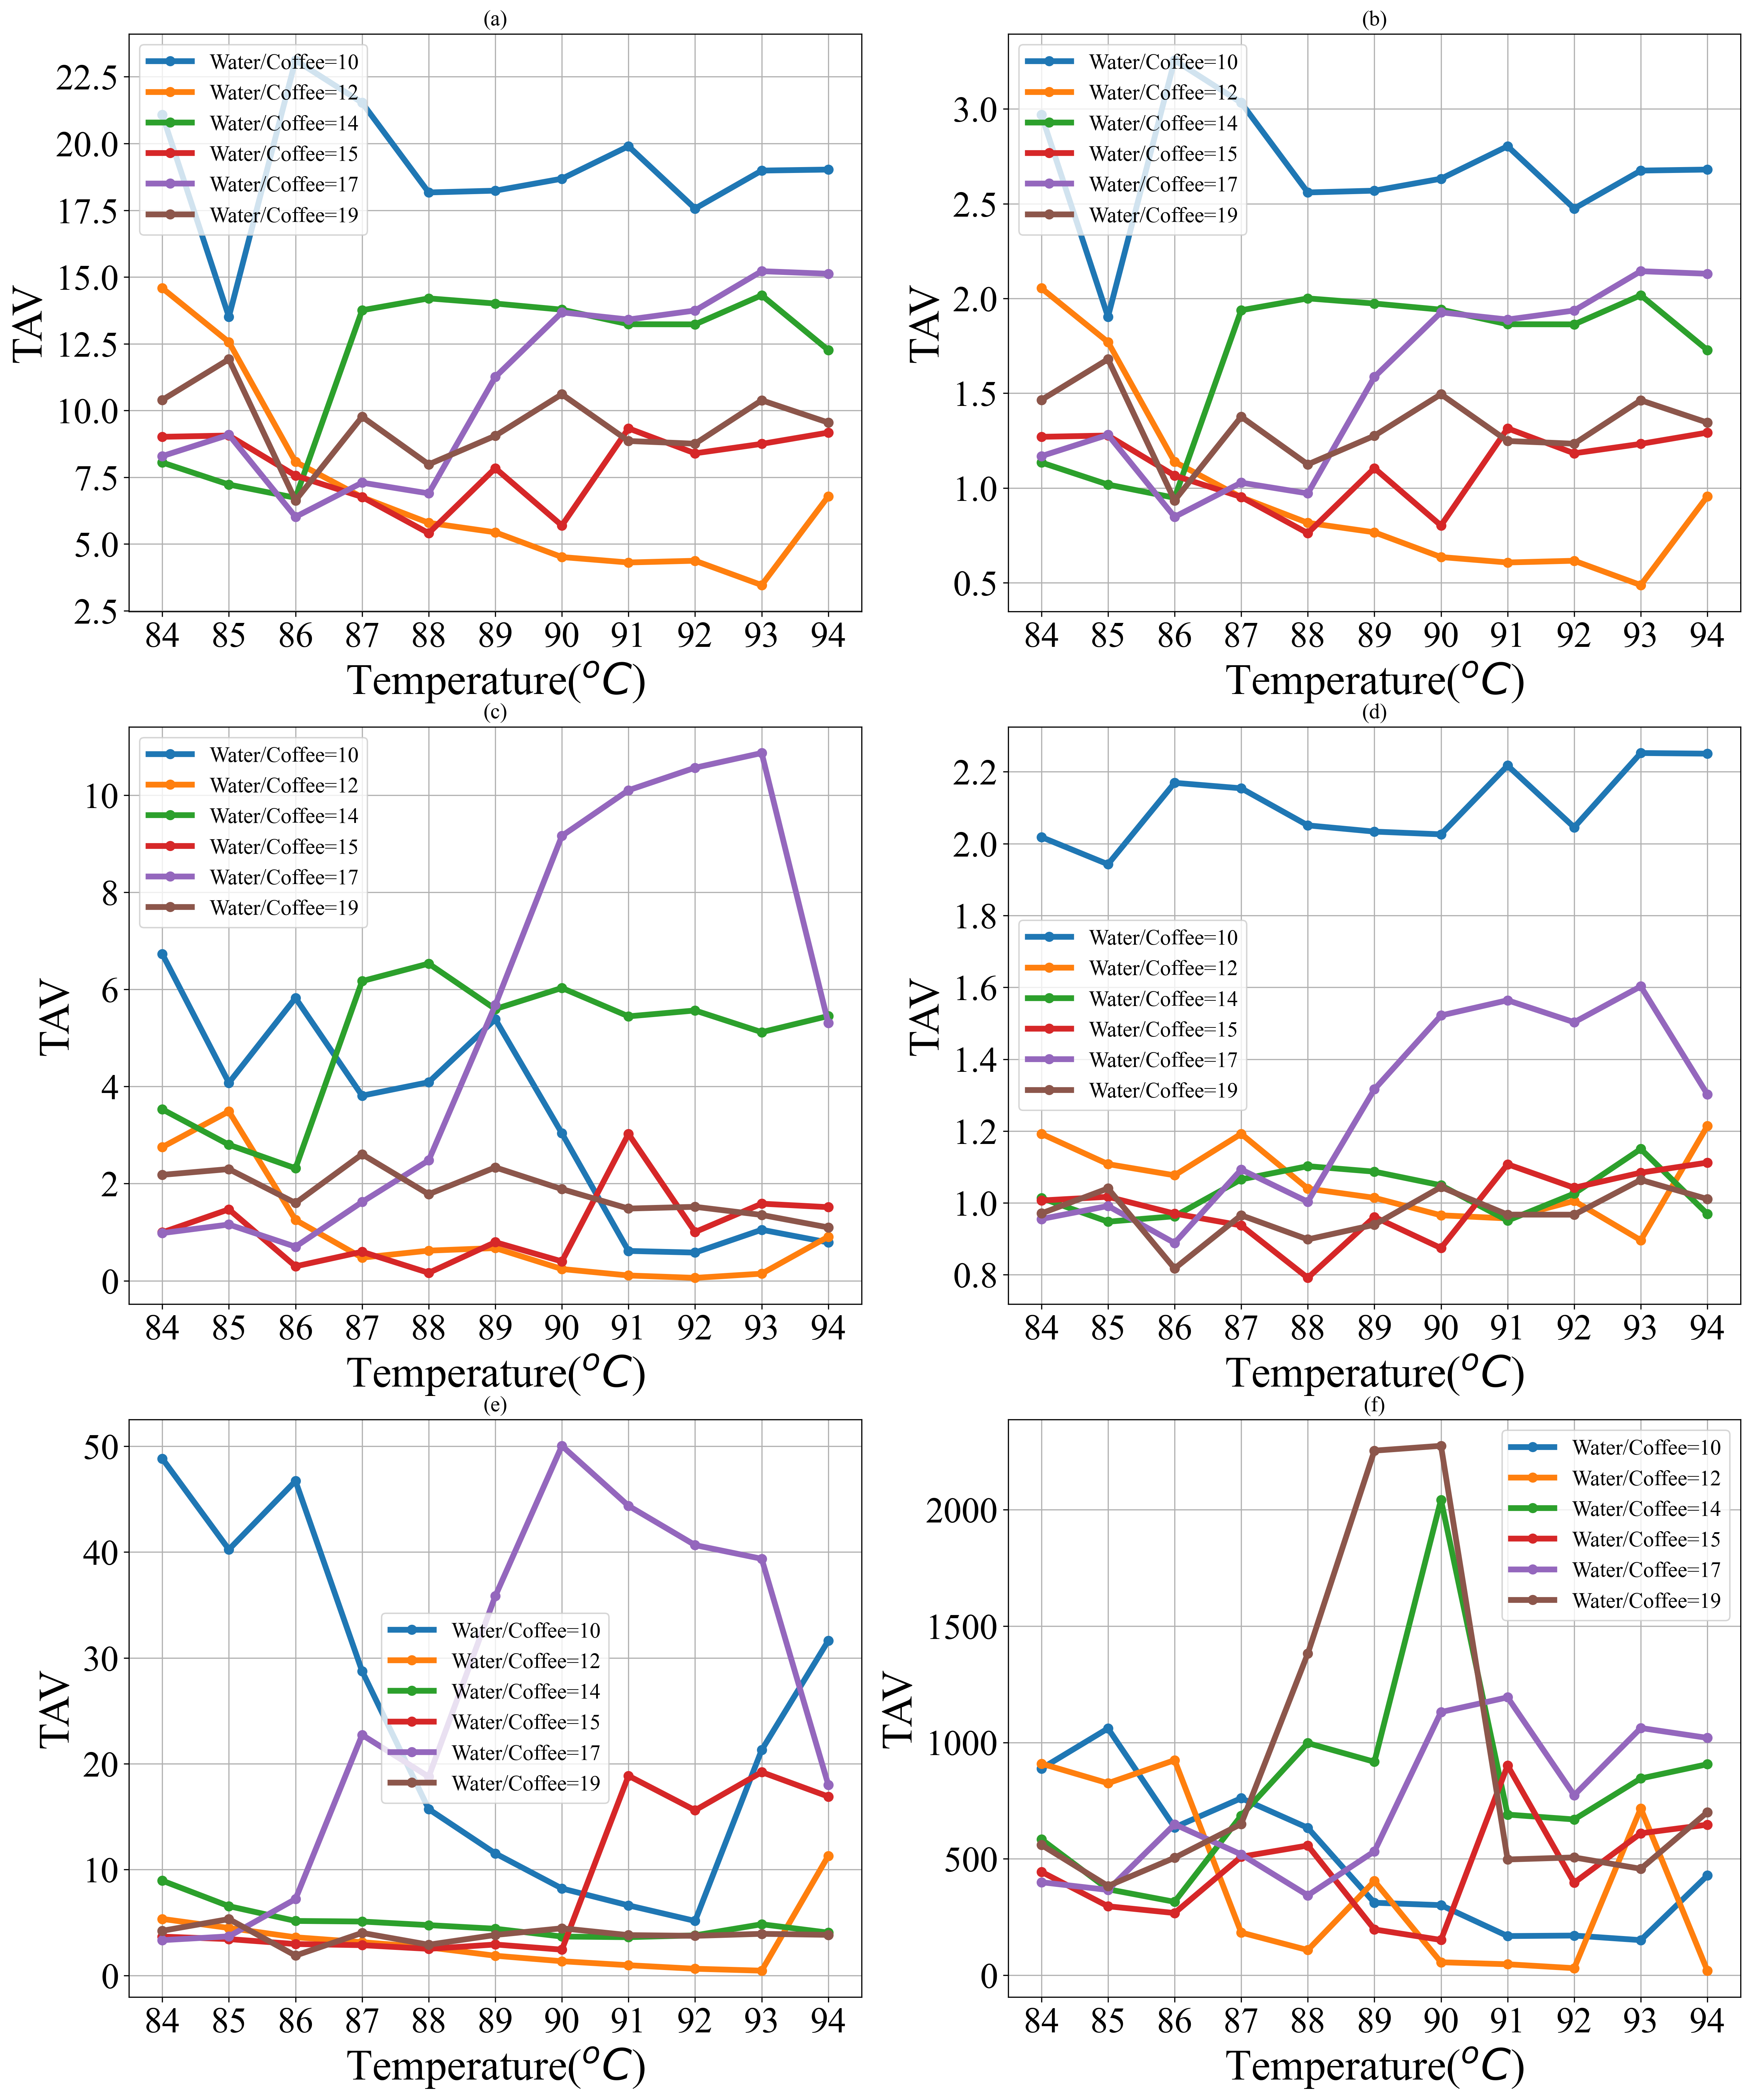

In [11]:
name = ['CGA(Bitterness)','CGA(Acidity)','Citric acid','Quinic acid','Caffeic acid','Caffeine']
number = ['(a)','(b)','(c)','(d)','(e)','(f)']
plt.figure(dpi =300,figsize = (20,25))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot(name[i],number[i])